In [1]:
%pylab inline
import sys
sys.path.append('/home/acurtis/proj/t1fitter/t1fitter/')
import t1fitter
import util
import optim

import scipy
import numpy as np



Populating the interactive namespace from numpy and matplotlib


In [46]:
fitter = t1fitter.T1Fitter()

#make some small fake data so we can test gradients

sz = (14,14,12)

dat = np.ones(sz + (2,))

dat[2:6,:,:,0] = 1.5
dat[6:-2,:,:,0] = 2

dat[2:6,:,:,1] = 2
dat[6:-2,:,:,1] = 2

dat[:,6:-2,...] *= 0.5

dat[:,:,2:6,:] *= 2

dat = dat.transpose((3,0,1,2))


b1 = np.ones(sz)
mask = np.zeros_like(b1)

ms=3
mask[ms:-ms,ms:-ms,ms:-ms] = 1

In [47]:
fitter.data = dat
fitter.mask = mask
fitter.b1map = b1
fitter.volshape = list(sz)

fitter.l1_lam = 1.0
fitter.kern_sz = 2
fitter.huber_scale = 0.5
fitter.l1_mode = 'huber'

fitter.l2_lam = 0
fitter.outpath='.'
fitter.smooth=1
fitter.l2_mode = 'smooth_vfa'
fitter.start_mode = 'vfa'
fitter.fit_method='nlreg'
fitter.log.setLevel(0)

fitter.flips = np.array([14.0, 3.0])*np.pi/180.0
fitter.trs = np.array([10.0, 10.0])*1e-3


x0 = fitter.nlreg_fit(prep_only=True)

# get t1 optimizer instance once everything is prepped
tfit = fitter.tfit


print (b1.shape)
print (mask.shape)
print np.sum(mask)
print (dat.shape)
print (x0.shape)

bounds = np.array([[0.001,0.01],[20.0,8.0]])

tfit.run_fit(x0, bounds=bounds, prep_only=True)

tfit.obj_scale = 0.0

print (np.sum(tfit.x0))

tfit.x0 += 1
print (np.sum(tfit.x0))



(14, 14, 12)
(14, 14, 12)
384.0
(2, 2352)
(14, 14, 12, 2)
1447.41169386
2215.41169386


In [48]:
def insertVol(x, dims=2):
    vol = np.zeros(sz + (dims,))
    vol[mask>0,:] = x.reshape(-1,dims)
    return vol

In [49]:
myx = tfit.x0*0.5
gres = tfit.gradient(myx).reshape(-1,2)
gv = insertVol(gres)

In [50]:
#check close to data
myx = myx - 0.5*gres.ravel()
gres = tfit.gradient(myx).reshape(-1,2)
gv = insertVol(gres)

In [51]:
tfit.objective(myx)

43.144808194313924

In [52]:
vx0 = fitter.fit.copy().reshape(sz+(2,))

In [53]:
vx0 = x0.copy().reshape(sz+(2,))*0.50

<matplotlib.colorbar.Colorbar instance at 0x7f6994226f80>

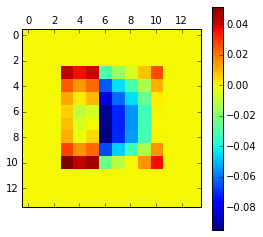

In [54]:
matshow(gv[:,:,6,0])
colorbar()

In [55]:
myx = tfit.x0*0.5
gtest = tfit.gradient(myx)
szg = gtest.shape
gv = insertVol(gtest.reshape(-1,2))


In [56]:
sum(gv**2)

2.8033167151486733

In [57]:
eps = 1e-7
gnum = np.zeros(szg)
for x in arange(szg[0]):
    myx2 = myx.copy()
    myx2[x] += eps
    f1 = tfit.objective(myx)
    f2 = tfit.objective(myx2)
    gnum[x] = (f2-f1)/eps
    
gvn = insertVol(gnum.reshape(-1,2))


<matplotlib.colorbar.Colorbar instance at 0x7f699455e950>

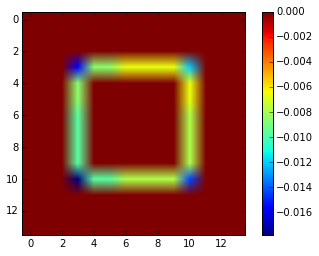

In [58]:
imshow((gvn[:,:,7,0] - gv[:,:,7,0]))
#clim([0,1])
colorbar()

In [59]:
(sum((gvn -gv)**2))

0.075941672543496597

<matplotlib.colorbar.Colorbar instance at 0x7f69943ae950>

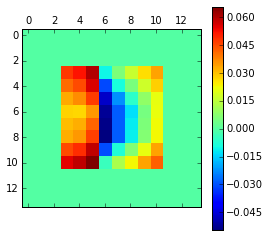

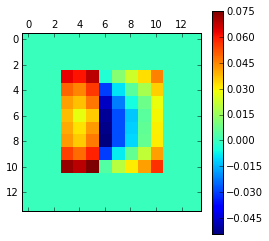

In [60]:
matshow((gvn[:,:,7,0]))
colorbar()
matshow((gv[:,:,7,0]))
colorbar()


<matplotlib.colorbar.Colorbar instance at 0x7f6994510e18>

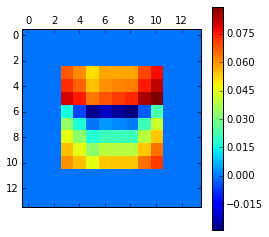

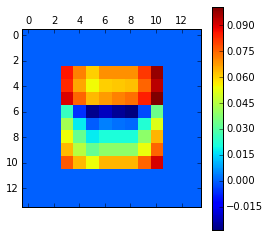

In [61]:
matshow((gvn[:,:,7,1]))
colorbar()
matshow((gv[:,:,7,1]))
colorbar()


/home/acurtis/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: RuntimeWarning: invalid value encountered in divide
  if __name__ == '__main__':


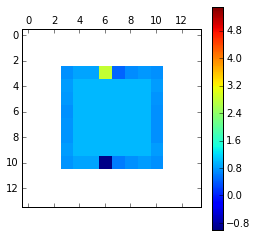

In [62]:
matshow((gvn[:,:,7,0])/(gv[:,:,7,0]))
colorbar()
clim([-1.0,5.5])

In [63]:
(gvn[:,:,7,1]/gv[:,:,7,1] ) [6,6]

/home/acurtis/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: RuntimeWarning: invalid value encountered in divide
  if __name__ == '__main__':


0.99999861156667424

In [64]:
gvn[6,6,6,0]

-0.09808402978705999

In [65]:
gv[6,6,6,0]

-0.098084160209029311

In [66]:
gvn[6,6,6,1]

-0.046002881504136894

In [67]:
gv[6,6,6,1]

-0.046002889098828631